In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import plotly as pt
import cufflinks as cf
cf.go_offline()

import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
start = dt.datetime(2006, 1, 1)

In [3]:
end = dt.datetime(2016,1,1)

In [4]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,365.387573
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,358.641724
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,360.420868
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,360.420868
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,358.715729


In [6]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], keys=tickers, axis=1)

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777508  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418793  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.461819  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.411613  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.433125  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  33.464516  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  33.487453  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  33.579292  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  33.613705  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  33.969551  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353481  
2006-01-04   31.799999  31.530001  10870000.0  20.117414  
2006-01-05   31.500000  31.495001  10158000.0  20.095076  
2006-01-06   31.580000  31.680000   8403800.0  20.213114  
2006-01-09   31.674999  31.674999   5619600.0  20.209927  

[5 rows x 36 columns]

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [11]:
returns = pd.DataFrame()

In [12]:
for x in tickers:
    returns[x + " Returns"] = bank_stocks[x]["Close"].pct_change()

In [13]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


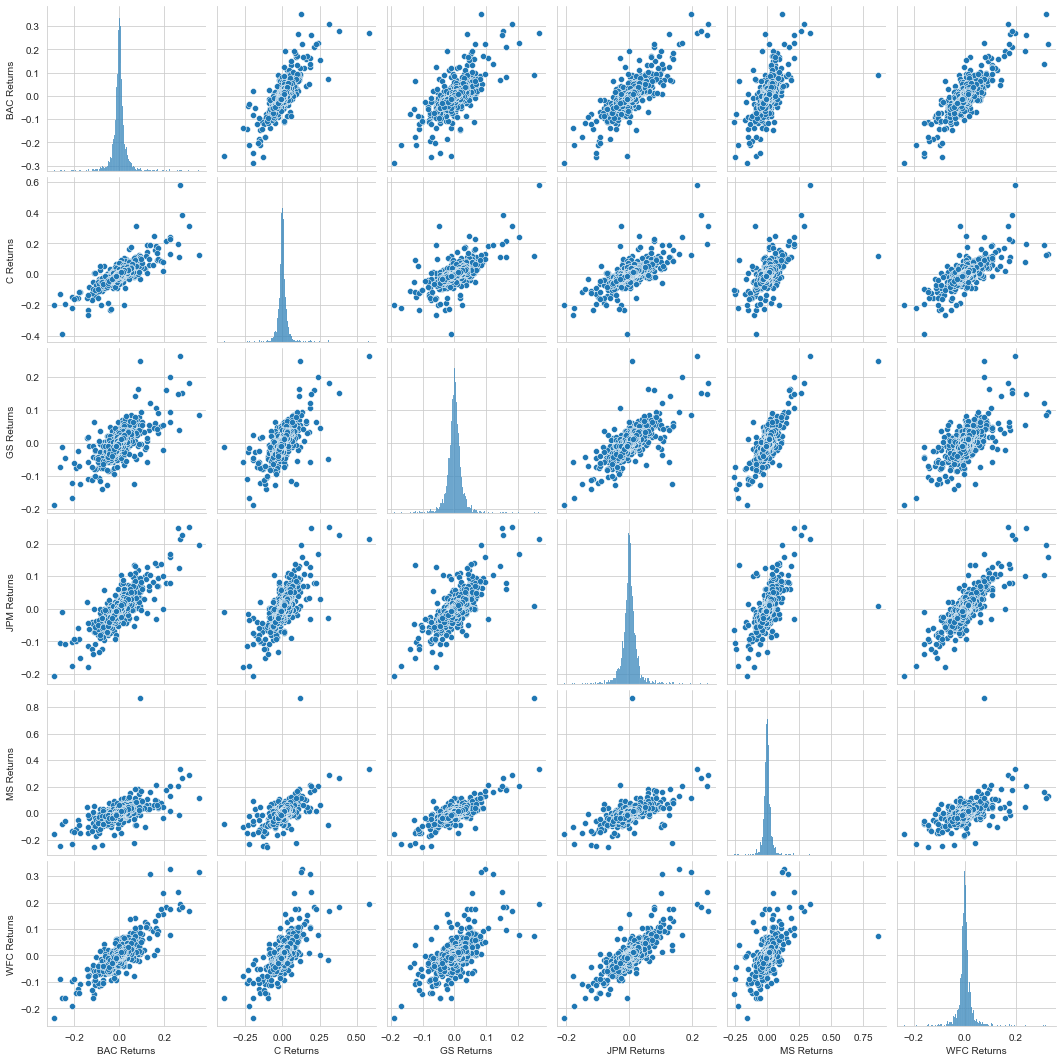

In [14]:
sns.pairplot(returns[1:])

In [15]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [17]:
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [18]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

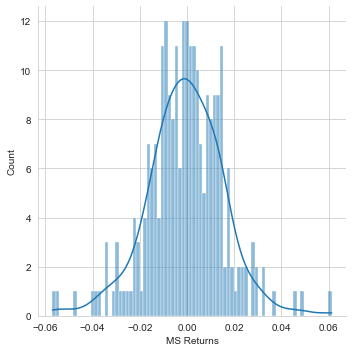

In [19]:
sns.displot(x=returns.loc['2015-01-01':'2015-12-31']["MS Returns"], kde=True, bins=80)

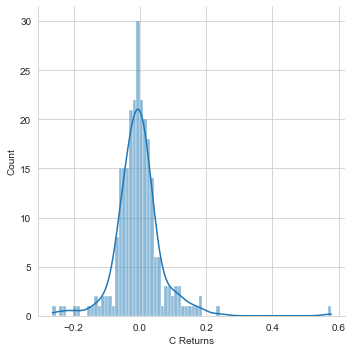

In [20]:
sns.displot(x=returns.loc['2008-01-01':'2008-12-31']["C Returns"], kde=True, bins=80)

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


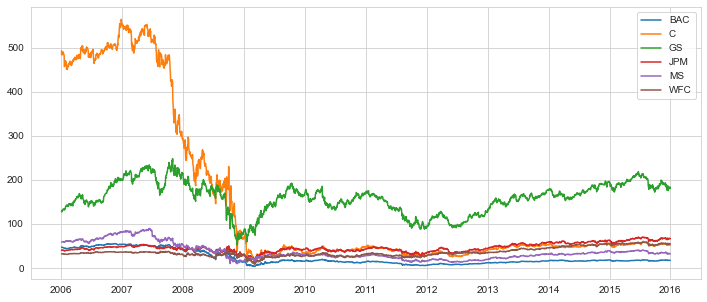

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(bank_stocks.xs(key='Close',axis=1,level='Stock Info'))
plt.legend(tickers)

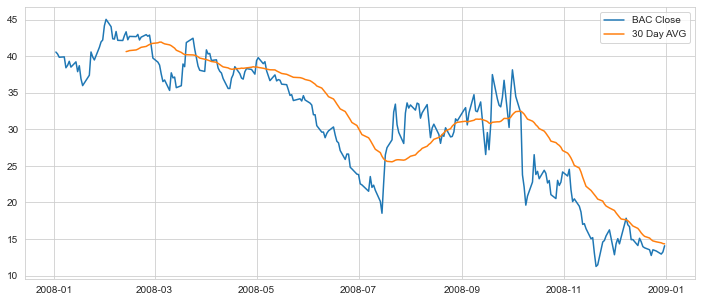

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(bank_stocks.loc['2008-01-01':'2008-12-31']["BAC"]["Close"], label="BAC Close")
plt.plot(bank_stocks.loc['2008-01-01':'2008-12-31']["BAC"]["Close"].rolling(30).mean(), label="30 Day AVG")
plt.legend()

In [24]:
corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [25]:
corr.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

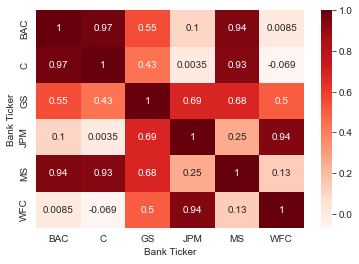

In [26]:
sns.heatmap(corr, annot=True, cmap="Reds")

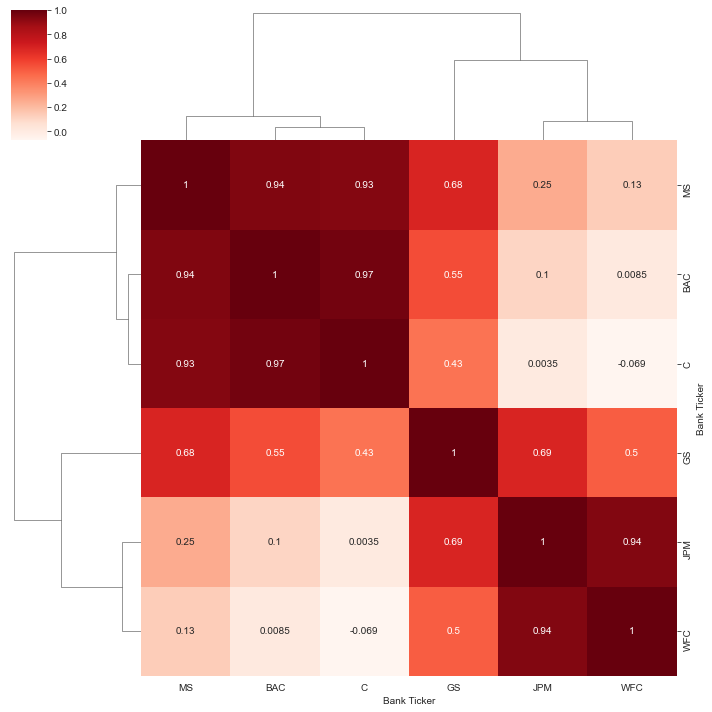

In [27]:
sns.clustermap(corr, annot=True, cmap="Reds")

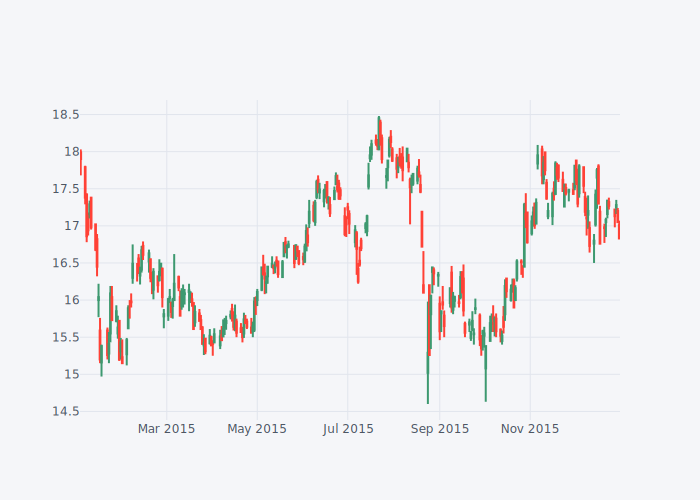

In [28]:
bank_stocks.loc['2015-01-01':'2016-01-01']["BAC"].iplot(kind="candle")

In [29]:
MS['Close'].loc['2015-01-01':'2016-01-01']

Date
2015-01-02    38.709999
2015-01-05    37.500000
2015-01-06    36.419998
2015-01-07    36.939999
2015-01-08    37.490002
                ...    
2015-12-24    32.480000
2015-12-28    32.169998
2015-12-29    32.549999
2015-12-30    32.230000
2015-12-31    31.809999
Name: Close, Length: 252, dtype: float64

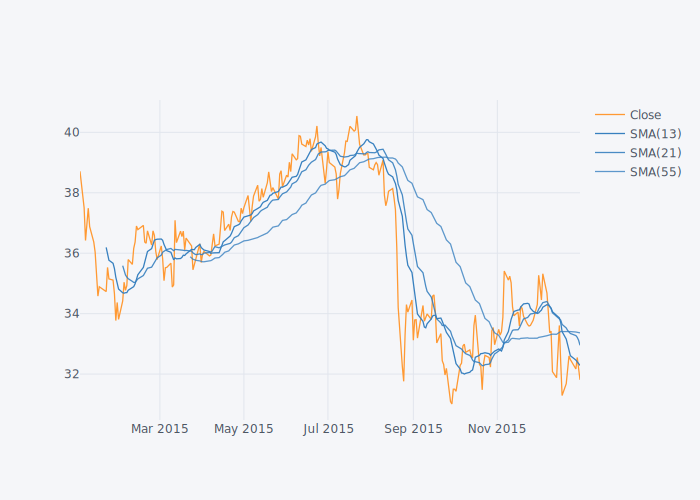

In [30]:
bank_stocks.loc['2015-01-01':'2015-12-31']["MS"]["Close"].ta_plot(study='sma', 
    periods=[13,21,55], title='Simple Moving Averages')

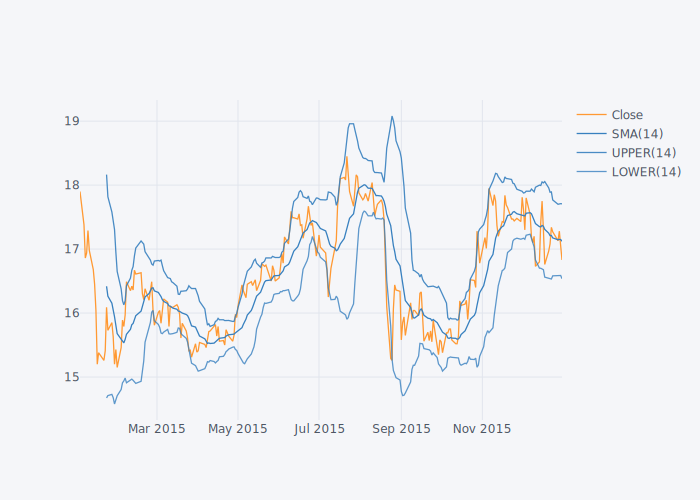

In [31]:
bank_stocks.loc['2015-01-01':'2015-12-31']["BAC"]["Close"].ta_plot(study='boll', 
    periods=14, title='Bollinger Band Plot')